In [ ]:
from google.colab import files

# Upload a single file
uploaded = files.upload()

# Or upload multiple files
# uploaded = files.upload()

Saving data_fff_vol.csv to data_fff_vol (1).csv


In [ ]:
import pandas as pd
df= pd.read_csv("data_fff_vol.csv")

In [ ]:
print(df)

       Unnamed: 0     SYMBOL  STRIKE_PR    CLOSE   TIMESTAMP   UNDER_CLOSE  \
0           26656  BANKNIFTY    26900.0   749.45  2019-09-06  27247.900391   
1           26655  BANKNIFTY    26800.0   778.45  2019-09-06  27247.900391   
2           26647  BANKNIFTY    28500.0    42.35  2019-09-06  27247.900391   
3           26654  BANKNIFTY    26700.0   846.75  2019-09-06  27247.900391   
4           26653  BANKNIFTY    26500.0  1028.45  2019-09-06  27247.900391   
...           ...        ...        ...      ...         ...           ...   
11136       66236      NIFTY    14500.0     3.00  2019-11-15  11895.450195   
11137       66235      NIFTY    14000.0     2.40  2019-11-15  11895.450195   
11138       66234      NIFTY    13500.0     2.40  2019-11-15  11895.450195   
11139       66246      NIFTY    13000.0    95.00  2019-11-15  11895.450195   
11140       66104  BANKNIFTY    33000.0    16.65  2019-11-15  31008.400391   

       risk_free_rate  to_expiry  VOLATILITY  
0               

In [ ]:
import numpy as np
from scipy.stats import norm
df = df[df['to_expiry'] != 0]

# Resetting index and removing old indexes
df = df.reset_index(drop=True)
T=np.array(df['to_expiry'])
sigma=np.array(df['VOLATILITY'])
S=np.array(df['UNDER_CLOSE'])
K=np.array(df['STRIKE_PR'])
r=np.array(df['risk_free_rate'])


df['D1']=(np.log(S / K) + (r*T + 0.5 * (sigma ** 2) * T)) / (sigma * np.sqrt(T))
df['D2']=df['D1'] - sigma * np.sqrt(T)
d2=np.array(df['D2'])
d1=np.array(df['D1'])

In [ ]:
print(sigma)
print(T)
print((sigma**2))

[28.58987163 28.58987163 28.58987163 ... 11.31081181 11.31081181
 16.1398661 ]
[0.07936508 0.07936508 0.0515873  ... 0.16269841 0.52380952 0.0515873 ]
[817.38075971 817.38075971 817.38075971 ... 127.93446383 127.93446383
 260.49527766]


In [ ]:
print(d1)
print(S)
print(K)
print(np.log(S/K))

[4.09374272 4.09420514 3.29227583 ... 2.48590025 4.49936791 1.90766848]
[27247.90039062 27247.90039062 27247.90039062 ... 11895.45019531
 11895.45019531 31008.40039062]
[26900. 26800. 28500. ... 13500. 13000. 33000.]
[ 0.01285018  0.01657458 -0.04492762 ... -0.12653369 -0.08879337
 -0.06224941]


In [ ]:
df['BLACK_SCH']= (S * norm.cdf(-d1))-(K * np.exp(-r * T) * norm.cdf(-d2))
print(df['BLACK_SCH'])

0       -15934.414053
1       -15875.176165
2       -20251.523503
3       -15815.938282
4       -15697.462528
             ...     
10306    -4848.681494
10307    -4678.746090
10308    -4508.872294
10309     -427.426336
10310   -21772.629143
Name: BLACK_SCH, Length: 10311, dtype: float64


In [ ]:
print(df)

       Unnamed: 0     SYMBOL  STRIKE_PR    CLOSE   TIMESTAMP   UNDER_CLOSE  \
0           26656  BANKNIFTY    26900.0   749.45  2019-09-06  27247.900391   
1           26655  BANKNIFTY    26800.0   778.45  2019-09-06  27247.900391   
2           26647  BANKNIFTY    28500.0    42.35  2019-09-06  27247.900391   
3           26654  BANKNIFTY    26700.0   846.75  2019-09-06  27247.900391   
4           26653  BANKNIFTY    26500.0  1028.45  2019-09-06  27247.900391   
...           ...        ...        ...      ...         ...           ...   
10306       66236      NIFTY    14500.0     3.00  2019-11-15  11895.450195   
10307       66235      NIFTY    14000.0     2.40  2019-11-15  11895.450195   
10308       66234      NIFTY    13500.0     2.40  2019-11-15  11895.450195   
10309       66246      NIFTY    13000.0    95.00  2019-11-15  11895.450195   
10310       66104  BANKNIFTY    33000.0    16.65  2019-11-15  31008.400391   

       risk_free_rate  to_expiry  VOLATILITY        D1        D

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Splitting data into features and target
x=['Unnamed: 0','SYMBOL','D1','D2','BLACK_SCH','CLOSE','TIMESTAMP']
X = df.drop(x,axis=1)
y = df['CLOSE']




In [ ]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating XGBoost regressor model
xgb_model = xgb.XGBRegressor()

# Training the model
xgb_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = xgb_model.predict(X_test)

# Calculating mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2529.847375304045


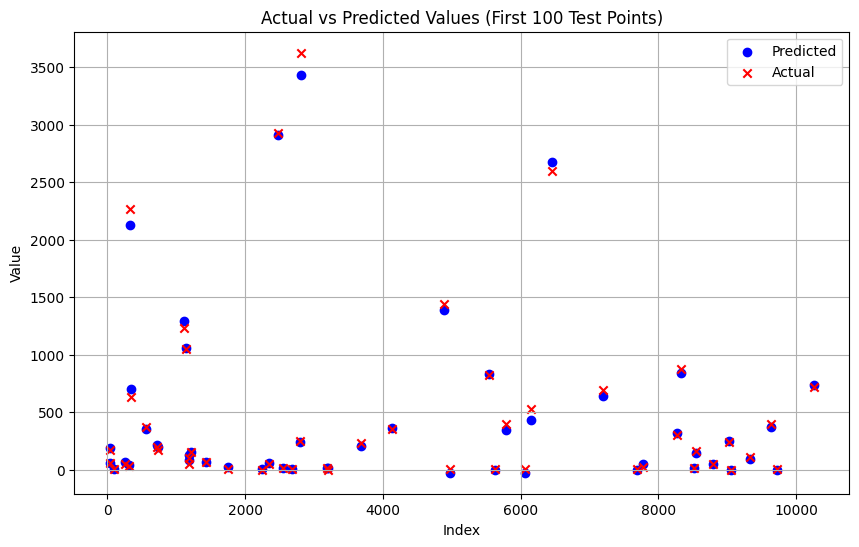

In [ ]:
import matplotlib.pyplot as plt

# Taking only the first 100 points for the test data
X_test_subset = X_test.iloc[:50]
y_test_subset = y_test.iloc[:50]

# Predicting on the subset of test data
y_pred_subset = xgb_model.predict(X_test_subset)

# Plotting actual vs predicted values with indexes on the x-axis
plt.figure(figsize=(10, 6))
plt.scatter(X_test_subset.index, y_pred_subset, color='blue', label='Predicted', marker='o')
plt.scatter(X_test_subset.index, y_test_subset, color='red', label='Actual', marker='x')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values (First 100 Test Points)')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# Assuming your DataFrame is named 'df'
banknifty_df = df[df['SYMBOL'] == 'BANKNIFTY']
under_price_array = banknifty_df['UNDER_CLOSE'].unique()
under_price_array_np = np.array(under_price_array)


In [ ]:
print(under_price_array_np)

[27247.90039062 27504.65039062 27776.19921875 27818.5
 28098.75       27855.         27131.75       27172.65039062
 26757.65039062 28981.55078125 30566.19921875 30183.09960938
 29586.05078125 30002.59960938 28725.5        28414.09960938
 27731.84960938 27767.55078125 28785.84960938 28013.44921875
 28042.5        28181.94921875 28555.09960938 28538.80078125
 28989.44921875 29120.25       29411.15039062 29459.59960938
 29107.94921875 29395.94921875 30330.55078125 30333.09960938
 30219.84960938 30609.59960938 30633.15039062 30749.40039062
 31115.55078125 30541.55078125 30749.94921875 31008.40039062]


In [ ]:
from google.colab import files

# Upload a single file
uploaded = files.upload()

# Or upload multiple files
# uploaded = files.upload()

Saving banknifty_data.csv to banknifty_data.csv


In [ ]:
bdf=pd.read_csv('banknifty_data.csv')

In [ ]:
print(bdf)

           Date         Close
0    2014-12-01  18525.300781
1    2014-12-02  18555.849609
2    2014-12-03  18645.849609
3    2014-12-04  18782.849609
4    2014-12-05  18756.750000
..          ...           ...
949  2019-11-25  31555.900391
950  2019-11-26  31718.349609
951  2019-11-27  31875.949219
952  2019-11-28  32122.949219
953  2019-11-29  31946.099609

[954 rows x 2 columns]


In [ ]:
bdf=bdf.drop("Date", axis=1)

In [ ]:
print(bdf)

            Close
0    18525.300781
1    18555.849609
2    18645.849609
3    18782.849609
4    18756.750000
..            ...
949  31555.900391
950  31718.349609
951  31875.949219
952  32122.949219
953  31946.099609

[954 rows x 1 columns]


In [ ]:
da=np.array(bdf['Close'])

3/3 [==============================] - 0s 7ms/step


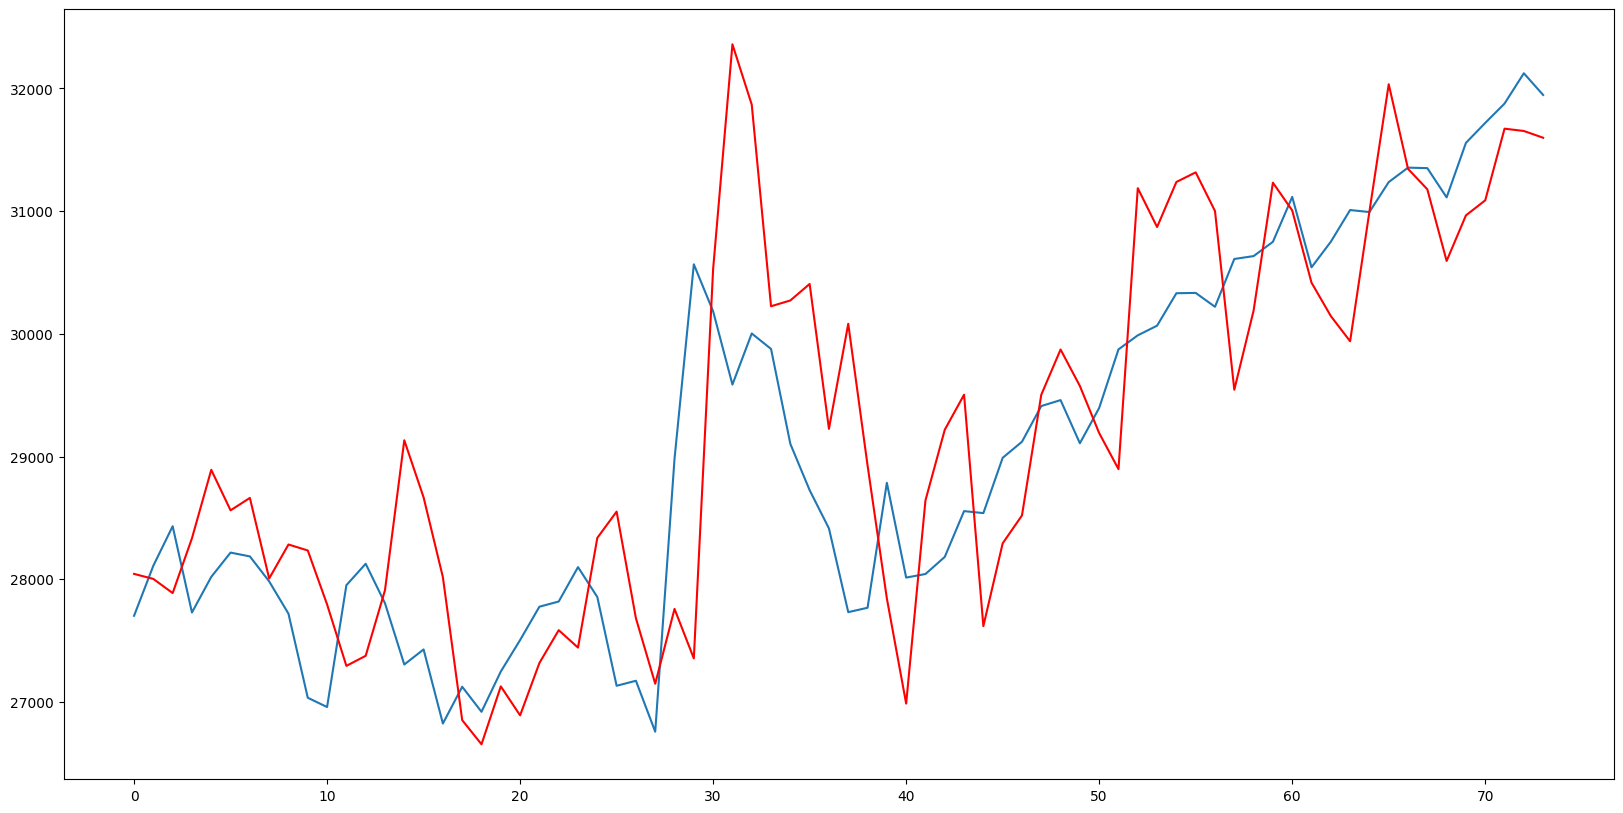

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, RepeatVector, Flatten, TimeDistributed, Conv1D, MaxPooling1D

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


df_1=bdf.values
df_1=df_1.astype('float32')

scaler = MinMaxScaler(feature_range=(-1,1))
ts = scaler.fit_transform(df_1)
timestep = 30

X= []
Y=[]

raw_data=ts

for i in range(len(raw_data)- (timestep)):
    X.append(raw_data[i:i+timestep])
    Y.append(raw_data[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 850
Xtrain = X[:k,:,:]
Ytrain = Y[:k]
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(30, 1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=200, verbose=0)
Xtest = X[k:,:,:]
Ytest= Y[k:]
preds = model.predict(Xtest)
preds = scaler.inverse_transform(preds)


Ytest=np.asanyarray(Ytest)
Ytest=Ytest.reshape(-1,1)
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)
Ytrain=Ytrain.reshape(-1,1)
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds)
from matplotlib import pyplot
pyplot.figure(figsize=(20,10))
pyplot.plot(Ytest)
pyplot.plot(preds, 'r')
pyplot.show()


In [ ]:
print(predicted_values)

[[30902.191]
 [31505.53 ]
 [30766.652]
 [32315.86 ]
 [32520.79 ]
 [33250.383]
 [33959.703]
 [33300.95 ]
 [33303.59 ]
 [32675.01 ]
 [31722.15 ]
 [31098.275]
 [31691.996]
 [32067.477]
 [31922.   ]
 [33101.11 ]
 [32878.047]
 [34359.19 ]
 [33199.785]
 [33073.1  ]]


In [ ]:
print(bdf)

None


In [ ]:
print(Ytest)

[[27702.05 ]
 [28110.451]
 [28431.9  ]
 [27729.1  ]
 [28019.2  ]
 [28217.   ]
 [28186.1  ]
 [27982.45 ]
 [27719.05 ]
 [27034.2  ]
 [26958.648]
 [27951.35 ]
 [28126.15 ]
 [27804.3  ]
 [27305.2  ]
 [27427.85 ]
 [26824.15 ]
 [27123.85 ]
 [26919.701]
 [27247.898]
 [27504.65 ]
 [27776.2  ]
 [27818.5  ]
 [28098.75 ]
 [27855.   ]
 [27131.75 ]
 [27172.65 ]
 [26757.652]
 [28981.55 ]
 [30566.2  ]
 [30183.102]
 [29586.05 ]
 [30002.6  ]
 [29876.65 ]
 [29103.15 ]
 [28725.5  ]
 [28414.102]
 [27731.85 ]
 [27767.55 ]
 [28785.85 ]
 [28013.45 ]
 [28042.5  ]
 [28181.95 ]
 [28555.1  ]
 [28538.8  ]
 [28989.45 ]
 [29120.25 ]
 [29411.15 ]
 [29459.6  ]
 [29107.95 ]
 [29395.95 ]
 [29873.05 ]
 [29987.5  ]
 [30066.25 ]
 [30330.55 ]
 [30333.1  ]
 [30219.85 ]
 [30609.598]
 [30633.15 ]
 [30749.4  ]
 [31115.55 ]
 [30541.55 ]
 [30749.95 ]
 [31008.4  ]
 [30992.1  ]
 [31236.25 ]
 [31353.85 ]
 [31349.95 ]
 [31111.6  ]
 [31555.9  ]
 [31718.35 ]
 [31875.95 ]
 [32122.95 ]
 [31946.1  ]]


In [ ]:
# Initial input for prediction
input_sequence = Xtest[-1,:,:].reshape(1, timestep, 1)  # Last sequence in the test data

# Number of steps to predict
steps = 20

predicted_values = []

for _ in range(steps):
    # Predict next value
    next_pred = model.predict(input_sequence)

    # Append prediction to the list
    predicted_values.append(next_pred[0][0])

    # Update input sequence by removing the first element and appending the predicted value
    input_sequence = np.append(input_sequence[:,1:,:], next_pred.reshape(1,1,1), axis=1)

# Inverse transform the predicted values
predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1,1))

# Plotting


1/1 [==============================] - 0s 51ms/step


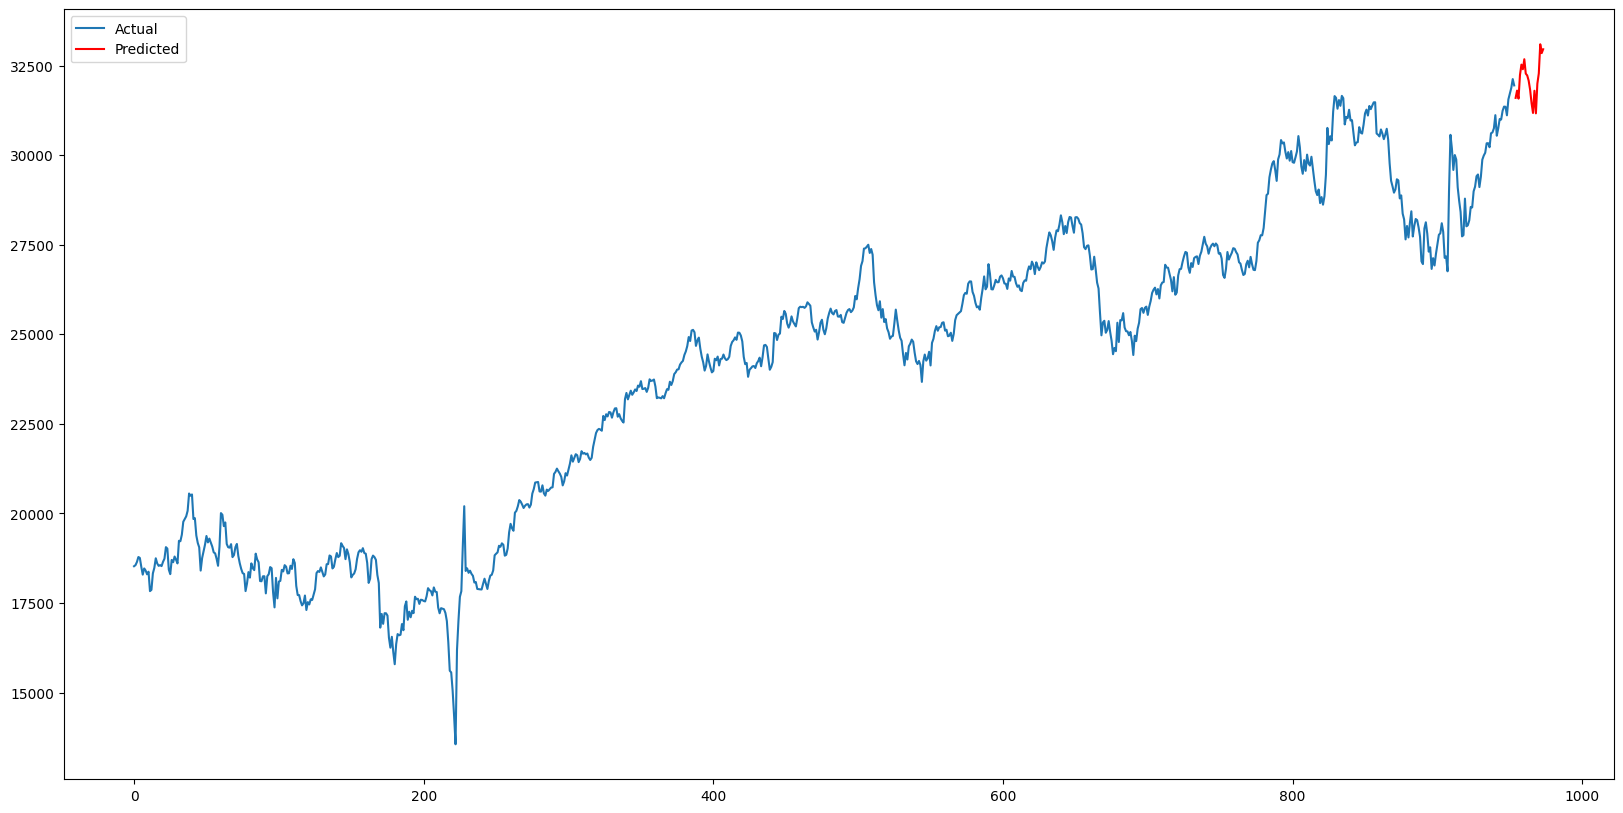

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(df_1, label='Actual')
plt.plot(range(len(df_1), len(df_1) + steps), predicted_values, 'r', label='Predicted')
plt.legend()
plt.show()


In [ ]:
last=bdf[-19:]
last=np.array(last)
print(last)

[[30333.09960938]
 [30219.84960938]
 [30609.59960938]
 [30633.15039062]
 [30749.40039062]
 [31115.55078125]
 [30541.55078125]
 [30749.94921875]
 [31008.40039062]
 [30992.09960938]
 [31236.25      ]
 [31353.84960938]
 [31349.94921875]
 [31111.59960938]
 [31555.90039062]
 [31718.34960938]
 [31875.94921875]
 [32122.94921875]
 [31946.09960938]]


In [ ]:
print(predicted_values)

[[30902.191]
 [31505.53 ]
 [30766.652]
 [32315.86 ]
 [32520.79 ]
 [33250.383]
 [33959.703]
 [33300.95 ]
 [33303.59 ]
 [32675.01 ]
 [31722.15 ]
 [31098.275]
 [31691.996]
 [32067.477]
 [31922.   ]
 [33101.11 ]
 [32878.047]
 [34359.19 ]
 [33199.785]
 [33073.1  ]]


In [ ]:
dfb=df[df['SYMBOL']=="BANKNIFTY"]

In [ ]:
print(np.unique((dfb[dfb['TIMESTAMP']=="2019-11-15"]['STRIKE_PR'].values)))

[25500. 26000. 26500. 27000. 27500. 28000. 28500. 29000. 29500. 29600.
 29700. 29800. 29900. 30000. 30100. 30200. 30300. 30400. 30500. 30600.
 30700. 30800. 30900. 31000. 31100. 31200. 31300. 31400. 31500. 31600.
 31700. 31800. 31900. 32000. 32100. 32200. 32300. 32400. 32500. 32600.
 32700. 32800. 32900. 33000. 33100. 33200. 33300. 33400. 33500. 33700.]


In [ ]:
arr=np.unique(dfb[dfb['TIMESTAMP']=="2019-11-15"]['STRIKE_PR'].values)

In [ ]:
import pandas as pd

# Create a date range starting from November 15th
start_date = '2019-11-16'
end_date = '2019-12-01'
dates = pd.date_range(start=start_date, end=end_date)

# Create a DataFrame with the dates
df = pd.DataFrame({'Date': dates})

# Filter out Saturdays and Sundays
df = df[~df['Date'].dt.dayofweek.isin([5, 6])]

print(df)


         Date
2  2019-11-18
3  2019-11-19
4  2019-11-20
5  2019-11-21
6  2019-11-22
9  2019-11-25
10 2019-11-26
11 2019-11-27
12 2019-11-28
13 2019-11-29


In [ ]:
df['days_diff'] = (df['Date'] - df['Date'].iloc[0]).dt.days

# Subtract the difference from 18 and divide by 365
df['to_expiry'] = (18 - df['days_diff']) / 365

In [ ]:
ar=[]
for i in range(len(predicted_values)):
  ar.append(predicted_values[i][0])

In [ ]:
ar2=[]
for i in range(len(last)):
  ar2.append(last[i][0])
for i in range(len(predicted_values)):
  ar2.append(predicted_values[i][0])

In [ ]:
print(ar2)

[30333.099609375, 30219.849609375, 30609.599609375, 30633.150390625, 30749.400390625, 31115.55078125, 30541.55078125, 30749.94921875, 31008.400390625, 30992.099609375, 31236.25, 31353.849609375, 31349.94921875, 31111.599609375, 31555.900390625, 31718.349609375, 31875.94921875, 32122.94921875, 31946.099609375, 31597.475, 31801.436, 31576.855, 32235.531, 32526.889, 32396.984, 32676.598, 32275.188, 32223.518, 32078.98, 31824.904, 31452.691, 31176.834, 31796.965, 31165.947, 31992.963, 32279.734, 33093.88, 32846.914, 32955.355]


In [ ]:
def calculate_volatility(arr, window_size):
    # Calculate the rolling window standard deviation
    volatilities = np.std([arr[i:i+window_size] for i in range(len(arr)-window_size+1)], axis=1)
    return volatilities

# Calculate volatility with a window size of 20
volatility = calculate_volatility(ar2, window_size=20)

print(volatility)

[534.45468782 519.05480575 471.08087771 487.96650065 519.73752669
 531.29085786 575.89615087 536.35170327 500.02040527 471.11916994
 429.99814938 416.31045974 429.19282549 412.51947971 407.47458875
 400.01618377 404.33306805 474.10598276 507.63766467 543.84078429]


In [ ]:
df['VOLATILITY']=volatility[:10]

In [ ]:
df['UNDER_PR']=ar[:10]

In [ ]:
ad=[]
for i in range(len(df['UNDER_PR'])):
  ad.append(6.519)

In [ ]:
df['risk_free_rate']=ad

In [ ]:
# Repeat each row in df n times, where n is the length of arr
df_repeated = df.loc[df.index.repeat(len(arr))].reset_index(drop=True)

# Write the values of arr into a new column in df_repeated
df_repeated['Expiry'] = np.tile(arr, len(df))

print(df_repeated)

          Date  days_diff  to_expiry  VOLATILITY      UNDER_PR  \
0   2019-11-18          0   0.049315  534.454688  31597.474609   
1   2019-11-18          0   0.049315  534.454688  31597.474609   
2   2019-11-18          0   0.049315  534.454688  31597.474609   
3   2019-11-18          0   0.049315  534.454688  31597.474609   
4   2019-11-18          0   0.049315  534.454688  31597.474609   
..         ...        ...        ...         ...           ...   
495 2019-11-29         11   0.019178  471.119170  32078.980469   
496 2019-11-29         11   0.019178  471.119170  32078.980469   
497 2019-11-29         11   0.019178  471.119170  32078.980469   
498 2019-11-29         11   0.019178  471.119170  32078.980469   
499 2019-11-29         11   0.019178  471.119170  32078.980469   

     risk_free_rate   Expiry  
0             6.519  25500.0  
1             6.519  26000.0  
2             6.519  26500.0  
3             6.519  27000.0  
4             6.519  27500.0  
..              ...  

In [ ]:
df_repeated= df_repeated.rename(columns={'UNDER_PR': 'UNDER_CLOSE'})

In [ ]:
df_repeated= df_repeated.rename(columns={'Expiry': 'STRIKE_PR'})

In [ ]:
print(df_repeated)

          Date  days_diff  to_expiry  VOLATILITY   UNDER_CLOSE  \
0   2019-11-18          0   0.049315  534.454688  31597.474609   
1   2019-11-18          0   0.049315  534.454688  31597.474609   
2   2019-11-18          0   0.049315  534.454688  31597.474609   
3   2019-11-18          0   0.049315  534.454688  31597.474609   
4   2019-11-18          0   0.049315  534.454688  31597.474609   
..         ...        ...        ...         ...           ...   
495 2019-11-29         11   0.019178  471.119170  32078.980469   
496 2019-11-29         11   0.019178  471.119170  32078.980469   
497 2019-11-29         11   0.019178  471.119170  32078.980469   
498 2019-11-29         11   0.019178  471.119170  32078.980469   
499 2019-11-29         11   0.019178  471.119170  32078.980469   

     risk_free_rate  STRIKE_PR  
0             6.519    25500.0  
1             6.519    26000.0  
2             6.519    26500.0  
3             6.519    27000.0  
4             6.519    27500.0  
..       

In [ ]:
# Specify the desired order of columns
new_order = ['Date', 'days_diff', 'STRIKE_PR','UNDER_CLOSE','risk_free_rate','to_expiry','VOLATILITY']

# Shuffle the columns to the specified order
df_shuffled = df_repeated.reindex(columns=new_order)

In [ ]:
print(df_shuffled)

          Date  days_diff  STRIKE_PR   UNDER_CLOSE  risk_free_rate  to_expiry  \
0   2019-11-18          0    25500.0  31597.474609           6.519   0.049315   
1   2019-11-18          0    26000.0  31597.474609           6.519   0.049315   
2   2019-11-18          0    26500.0  31597.474609           6.519   0.049315   
3   2019-11-18          0    27000.0  31597.474609           6.519   0.049315   
4   2019-11-18          0    27500.0  31597.474609           6.519   0.049315   
..         ...        ...        ...           ...             ...        ...   
495 2019-11-29         11    33200.0  32078.980469           6.519   0.019178   
496 2019-11-29         11    33300.0  32078.980469           6.519   0.019178   
497 2019-11-29         11    33400.0  32078.980469           6.519   0.019178   
498 2019-11-29         11    33500.0  32078.980469           6.519   0.019178   
499 2019-11-29         11    33700.0  32078.980469           6.519   0.019178   

     VOLATILITY  
0    534.

In [ ]:
x=['Date', 'days_diff']
X = df.drop(x,axis=1)
y_pred = xgb_model.predict(X_test)
print(y_pred)

[  2.7662096  93.716965   39.870014  ... 267.34613   576.2893
 346.04205  ]
